In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
crimes = {1: 'Theft/Larcery', 2: 'Robebery', 3: 'Nacotic/Alcochol',
          4: 'Assault', 5: 'Grand Auto Theft', 6: 'Vandalism',
          7: 'Burglary', 8: 'Homicide', 9: 'Sex Crime', 10: 'DUI'}

In [3]:
ladf = pd.read_csv('data/la_clean.csv')

In [4]:
ladf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980497 entries, 0 to 980496
Data columns (total 14 columns):
Unnamed: 0                      980497 non-null int64
CITY                            980497 non-null object
LATITUDE                        980497 non-null float64
LONGITUDE                       980497 non-null float64
STATION_NAME                    980497 non-null object
STATISTICAL_CODE_DESCRIPTION    980497 non-null object
STREET                          980497 non-null object
ZIP                             980497 non-null float64
CrimeCat                        980497 non-null int64
Hour                            980497 non-null int64
Month                           980497 non-null int64
Day                             980497 non-null int64
Year                            980497 non-null int64
DayOfWeek                       980497 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 104.7+ MB


In [5]:
ladf.head()

,Unnamed: 0,CITY,LATITUDE,LONGITUDE,STATION_NAME,STATISTICAL_CODE_DESCRIPTION,STREET,ZIP,CrimeCat,Hour,Month,Day,Year,DayOfWeek
0,1,MARINA DEL REY,33.981571,-118.460040,MARINA DEL REY,DRUNK: Alcohol,4100 ADMIRALTY WAY,90292.0,3,0,1,1,2012,7
1,2,COVINA,34.105441,-117.849251,SAN DIMAS,"BURGLARY, RESIDENCE: Night, Entry No Force",5100 GREER AVE,91724.0,7,0,1,1,2012,7
2,7,LOS ANGELES,34.043482,-118.159613,EAST LOS ANGELES,GRAND THEFT VEHICLE (GTA): Automobile/Passenge...,610 N COLONIA DE LOS CEDROS,90022.0,5,2,1,1,2012,7
3,10,LANCASTER,34.697267,-118.146393,LANCASTER,"BURGLARY, OTHER STRUCTURE: Day, Entry No Force",870 W LANCASTER BLVD,93534.0,7,15,4,21,2009,2
4,11,PASADENA,34.130000,-118.089695,TEMPLE,"BURGLARY, RESIDENCE: Day, Entry By Force",3070 GAINSBOUROUGH DR,91107.0,7,10,2,14,2012,2


In [6]:
week = ladf.groupby(['DayOfWeek', 'CrimeCat'])['Unnamed: 0'].count().unstack().reset_index()

In [7]:
X_week = week.drop('DayOfWeek', axis=1).values
sum_week = X_week.sum(axis=0)
X_week = X_week *1.0 / sum_week

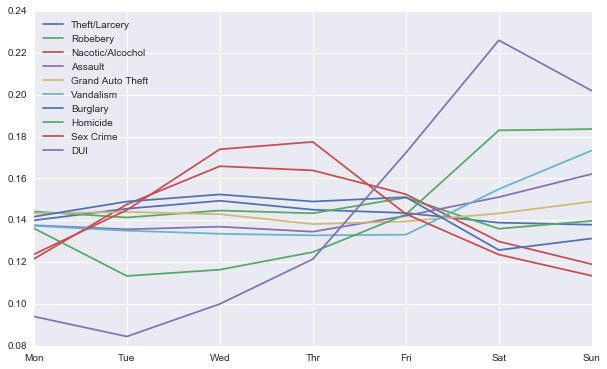

In [8]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(X_week[:, i], label=crimes[i+1])
plt.xticks(range(7), weekdays)
plt.legend(loc='upper left')
plt.show()

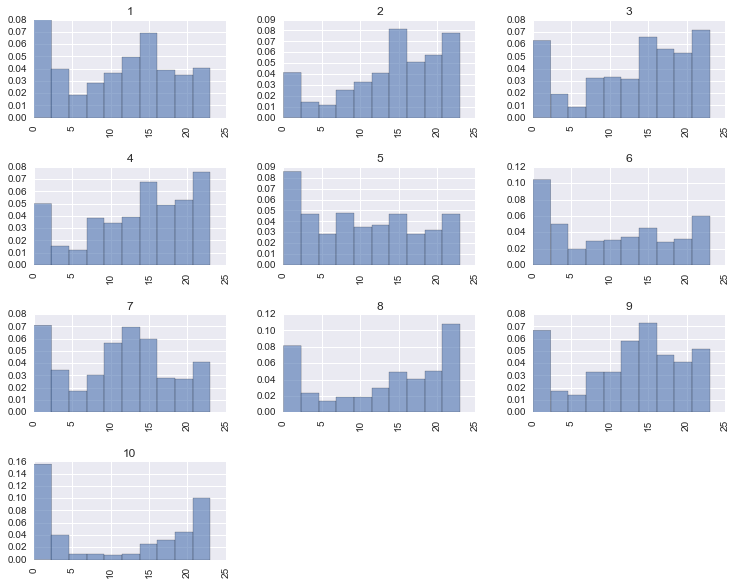

In [9]:
ladf.hist(column='Hour', by='CrimeCat', alpha=0.6, normed=1, figsize=(12,10))
plt.show()

In [10]:
def plot_depedent(tar, names):
    data = ladf.groupby([tar, 'CrimeCat'])['Unnamed: 0'].count().unstack().reset_index()
    X = data.drop(tar, axis=1).values
    sum_ = X.sum(axis=0)
    X = X *1.0 / sum_
    plt.figure(figsize=(10,6))
    for i in range(5):
        plt.plot(X[:, i], label=crimes[i+1])
    plt.xticks(range(len(names)), names)
    plt.legend(loc='upper left')
    plt.figure(figsize=(10,6))
    for i in range(5, 10):
        plt.plot(X[:, i], label=crimes[i+1])
    plt.xticks(range(len(names)), names)
    plt.legend(loc='upper left')
    plt.show()

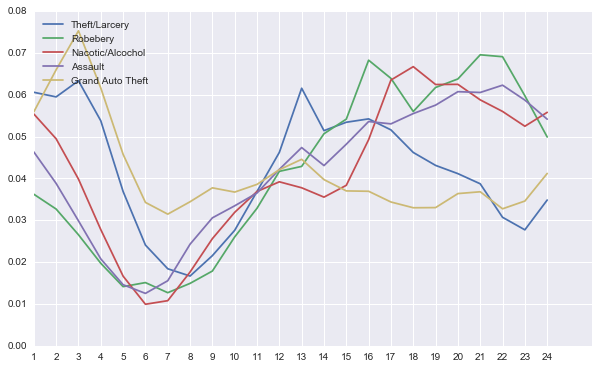

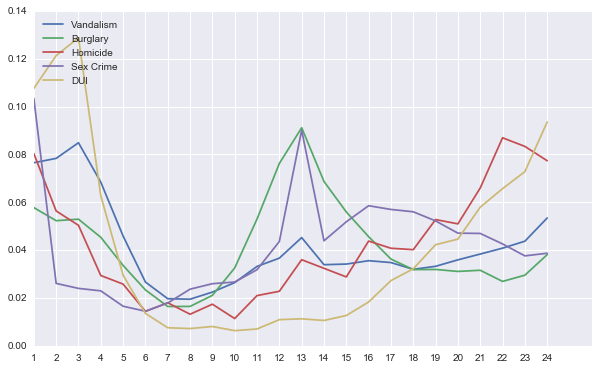

In [11]:
plot_depedent('Hour', range(1,25))

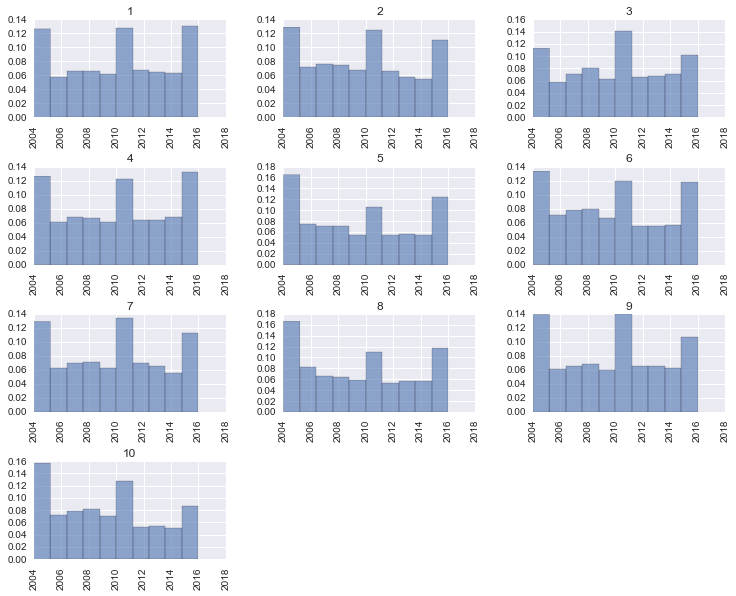

In [12]:
ladf.hist(column='Year', by='CrimeCat', alpha=0.6, normed=1, figsize=(12,10))
plt.show()

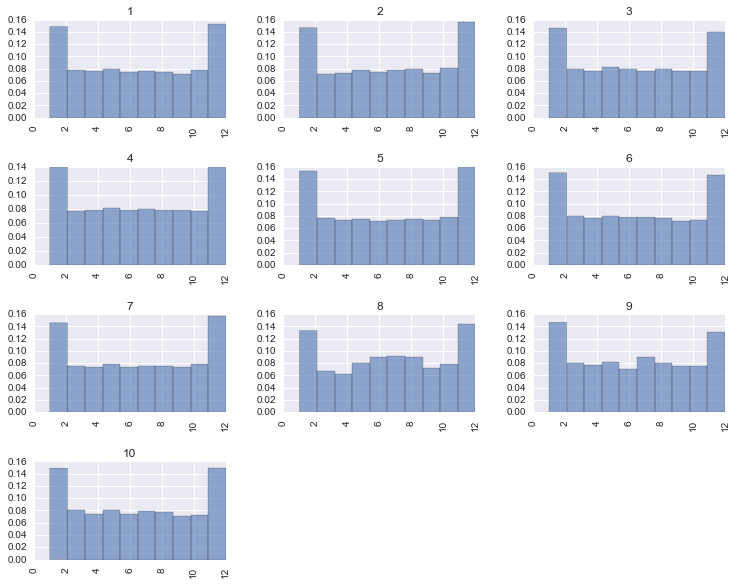

In [13]:
ladf.hist(column='Month', by='CrimeCat', alpha=0.6, normed=1, figsize=(12,10))
plt.show()

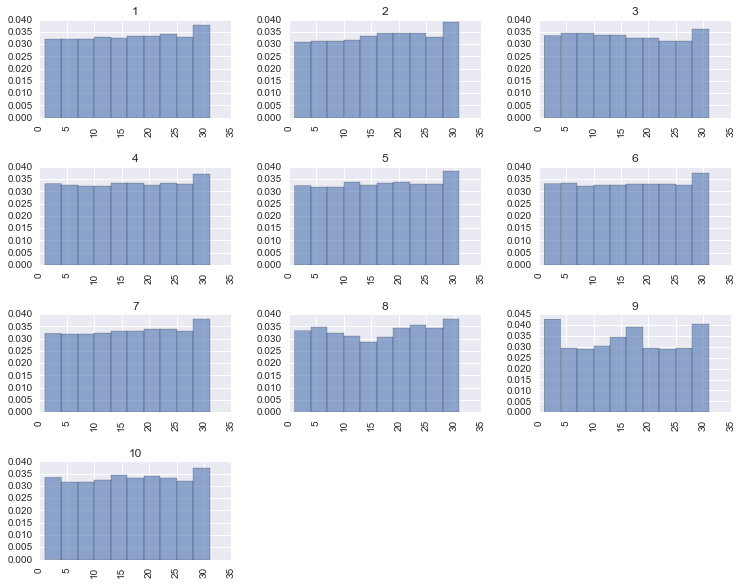

In [14]:
ladf.hist(column='Day', by='CrimeCat', alpha=0.6, normed=1, figsize=(12,10))
plt.show()

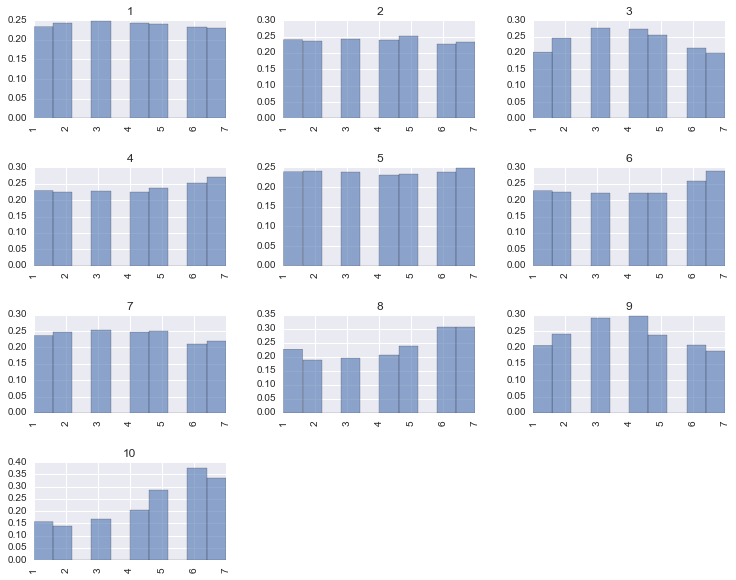

In [15]:
ladf.hist(column='DayOfWeek', by='CrimeCat', alpha=0.6, normed=1, figsize=(12,10))
plt.show()

In [16]:
def get_month_df(df):
    lamo = df.groupby(['Year', 'Month', 'ZIP', 'CrimeCat'])['Unnamed: 0'].count()
    lamo = lamo.unstack().reset_index()
    lamo = lamo.fillna(0)
    return lamo 


In [17]:
lamo = get_month_df(ladf)

In [18]:
def get_quater(x):
    if x < 4:
        return 1
    elif 4 <= x < 7:
        return 2
    elif 7 <= x < 10:
        return 3
    else:
        return 4

In [20]:
lamo['Quater'] = lamo['Month'].apply(get_quater)

In [23]:
lamo = lamo.drop('Month', axis=1).groupby(['Year', 'Quater', 'ZIP']).sum().reset_index()

In [25]:
X = lamo.drop(['Year', 'Quater', 'ZIP'], axis=1).values

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
def build_nmf_all(X, k=5):
    scaler = MinMaxScaler()
    X_sca = scaler.fit_transform(X)
    nmfModel = NMF(n_components=k)
    W = nmfModel.fit_transform(X_sca)
    H = nmfModel.components_
    print 'NMF done!'
    plot_heatmap(H.T, k=k)
    labelsNMF = W.argmax(axis=1)
    return W, H, labelsNMF, nmfModel

def plot_heatmap(data, title=None, k=5):
    fig, ax = plt.subplots(figsize = (12, 8))
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(k)+0.5, minor=False, )
    ax.set_yticks(np.arange(10)+0.5, minor=False)

    # want a more natural, table-like display
#     ax.invert_yaxis()
#     ax.xaxis.tick_top()
    classLabel = ['cls-{}:'.format(i) for i in range(1, k+1)]
    ax.set_xticklabels(classLabel, minor=False)
    ax.set_yticklabels(crimes.values(), minor=False)
    ax.set_title('Heatmap of Lattent Feature')
#     if title != None:
#         plt.savefig(title)
    plt.show()

NMF done!


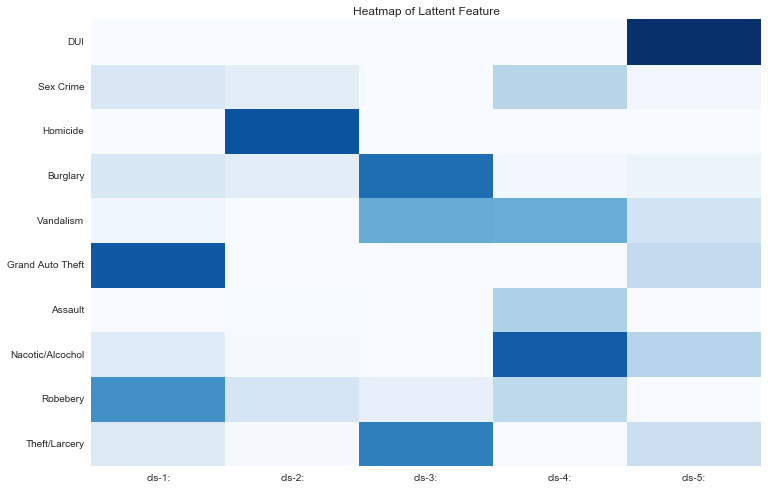

In [30]:
W, H, labelsNMF, nmfModel = build_nmf_all(X, k=5)

In [34]:
lamo['class'] = labelsNMF

In [44]:
numPost = lamo['ZIP'].unique().shape[0]
cntClass = lamo.groupby(['Year', 'Quater', 'class'])['ZIP'].count().unstack().reset_index()
X_class = cntClass.drop(['Year', 'Quater'], axis=1).values
X_class = 1.0 * X_class/ numPost

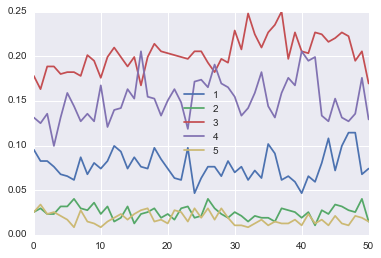

In [45]:
n = X_class.shape[1]
plt.figure()
for k in xrange(n):
    plt.plot(X_class[:,k], label=k+1)
plt.legend(loc='best')

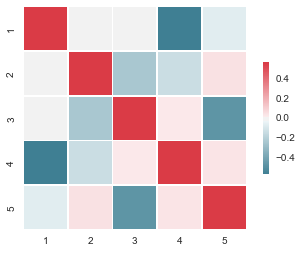

In [46]:

# Compute the correlation matrix
corr = pd.DataFrame(X_class).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True, xticklabels=range(1,6), yticklabels=range(1,6),
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [48]:
laqt = lamo.drop(range(1,11), axis=1)

In [51]:
pd.concat((laqt, pd.DataFrame(W)), axis=1)

CrimeCat,Year,Quater,ZIP,class,0,1,2,3,4
0,2004,1,90001.0,0,0.018618,0.002063,0.003341,0.006347,0.000000
1,2004,1,90002.0,0,0.016125,0.001155,0.000353,0.001131,0.000000
2,2004,1,90004.0,3,0.000000,0.000158,0.000316,0.001190,0.000000
3,2004,1,90005.0,2,0.000000,0.000000,0.000271,0.000000,0.000029
4,2004,1,90006.0,3,0.000000,0.000000,0.000000,0.001767,0.000128
5,2004,1,90007.0,3,0.000000,0.000000,0.020038,0.022125,0.000000
6,2004,1,90008.0,0,0.002809,0.000386,0.001241,0.000284,0.000000
7,2004,1,90011.0,3,0.000687,0.000000,0.000178,0.001003,0.000222
8,2004,1,90012.0,3,0.000000,0.041992,0.000953,0.077741,0.000000
9,2004,1,90013.0,3,0.000000,0.000000,0.000174,0.001772,0.000112
